# Описание проекта "Анализ результатов A/B-теста"
Совместно с отделом маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки.

Цель проекта - приоритизация гипотез (часть 1) и анализ результатов A/B-теста (часть 2).

Исходные данные для первой части:
- Hypothesis — описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Исходные данные для второй части:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()

In [2]:
try:    
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except: 
    hypothesis = pd.read_csv('D:\\practicum\\DA\\принятие решений в бизнесе\\hypothesis.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.set_option('display.max_colwidth', None) 
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

### метод ICE

In [6]:
# Применим метод ICE для приоритизации гипотез.
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'] 

In [7]:
hypothesis['ICE'] = round(hypothesis['ICE'], 2)
hypothesis.loc[:, ['hypothesis','ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE:
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

### метод RICE.

In [8]:
# Применим метод RICE для приоритизации гипотез.
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.loc[:, ['hypothesis','RICE']].sort_values('RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- Запустить акцию, дающую скидку на товар в день рождения.

In [9]:
best_hypothesis = hypothesis.sort_values('RICE', ascending=False).head()
best_hypothesis.loc[:, ['hypothesis', 'ICE', 'RICE']].style.background_gradient(axis=0)  

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000


Сам перечень перспективных гипотез остался неизменным, однако, порядок приоритизации при применении по RICE поменялся в зависимости от того, как много пользователей затронет гипотеза (параметр Reach).
Например, гипотеза о запуске акции, дающей скидку на товар в день рождения, имеющая первый приоритет по ICE, затронет малое количество пользователей (только именинников), и значение Reach равно 1, в то время как запуск формы подписки на все основные страницы имеет значение параметра Reach 10. 
При этом для новой формы подписки на все основные страницы параметр Impact (сила влияния изменения метрики на пользователей) не сильно меньше, чем для гипотезы со скидкой в день рождения, а параметр Efforts одинаков.
Таким образом, при применении метода RICE, охват оказывает большое значение

## Часть 2. Анализ A/B-теста

### Обработка данных

Рассмотрим полученные результаты A/B теста

In [10]:
try:    
    orders = pd.read_csv('/datasets/orders.csv')
except: 
    orders = pd.read_csv('D:\\practicum\\DA\\принятие решений в бизнесе\\orders.csv')

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
orders = orders.rename(columns={'transactionId': 'transaction_id',
                      'visitorId': 'visitor_id'})

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
orders.duplicated().sum()

0

In [15]:
orders['date'] = pd.to_datetime(orders['date'])

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [17]:
# проверим есть ли посетители, попавшие в обе группы
orders.groupby('visitor_id').agg({'group': 'nunique'}).reset_index().query('group > 1')['visitor_id'].nunique()

58

In [18]:
orders.groupby('visitor_id').agg({'group': 'nunique'}).reset_index().query('group > 1')['visitor_id'].unique()

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

На практике пользователи должны быть поделены по группам так, что они были только в одной группе и оставались в этой группе до конца теста. С учетом наличия в данных пользователей, попавших в обе группы, вопрос к успешности A/A-теста.

Если пользователь видит разные версии продукта (и с изменением, и без) в ходе одного исследования, неизвестно, какая именно повлияла на его решения и на метрики в конце теста, поэтому их необходимо исключить

In [19]:
duble_group_users = (
    orders.groupby('visitor_id')
    .agg({'group': 'nunique'})
    .reset_index().query('group > 1')['visitor_id']
    .unique()
    .tolist()
)
duble_group_users

[8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830]

In [20]:
double_id = orders.loc[orders['visitor_id'].isin(duble_group_users)]
double_id

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


In [21]:
# посмотрим на дубли, тк строк с такими id более 58 шт
double1 = double_id.groupby('visitor_id').agg({'group': 'sum'})
double1

,group
visitor_id,
8300375,BA
199603092,AABAA
232979603,BA
237748145,BAAAA
276558944,BA
351125977,BA
393266494,ABB
457167155,BBAB
471551937,AB


In [22]:
double2 = double_id.groupby(['visitor_id', 'date']).agg({'group': 'sum'})
double2

group
visitor_id date            
8300375    2019-08-01     B
           2019-08-07     A
199603092  2019-08-02     B
           2019-08-12     A
           2019-08-15     A
...                     ...
4256040402 2019-08-20     A
           2019-08-23     A
           2019-08-27     A
           2019-08-31    AB
4266935830 2019-08-29    AB

[147 rows x 1 columns]

In [23]:
double2['group'].unique()

array(['B', 'A', 'BA', 'BB', 'AB', 'ABBAA', 'BAA', 'BAB'], dtype=object)

С учетом того, что пользователи из списка с id, попавшим в обе группы, в разные даты находятся в разных группах, а должны все время находиться в одной, исключим их из таблицы orders

In [24]:
orders_clear = orders.loc[~orders['visitor_id'].isin(duble_group_users)]

**расчеты далее будем вести раздельно: с удаленными пользователями проведем расчет среднего чека, кумулятивной выручки и стат.значимости различий в чеке между группами (тк считаем только по заказам и необходимы чистые данные), с не удаленными - расчет конверсии и проверку стат.значимости различий в количестве заказов\
Расчет конверсии в заказы примем с учетом всех данных в таблице заказов, так как информация в таблице с посещениями кумулятивная и пользователей, попавших в обе группы оттуда исключить не представляется возможным**

In [25]:
orders_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [26]:
orders_clear['date'].nunique() # проверим остались ли все дни

31

In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [28]:
try:    
    visitors = pd.read_csv('/datasets/visitors.csv')
except: 
    visitors = pd.read_csv('D:\\practicum\\DA\\принятие решений в бизнесе\\visitors.csv')

In [29]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [30]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [31]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [32]:
visitors.duplicated().sum()

0

In [33]:
visitors['date'].value_counts()

2019-08-01    2
2019-08-17    2
2019-08-30    2
2019-08-29    2
2019-08-28    2
2019-08-27    2
2019-08-26    2
2019-08-25    2
2019-08-24    2
2019-08-23    2
2019-08-22    2
2019-08-21    2
2019-08-20    2
2019-08-19    2
2019-08-18    2
2019-08-16    2
2019-08-02    2
2019-08-15    2
2019-08-14    2
2019-08-13    2
2019-08-12    2
2019-08-11    2
2019-08-10    2
2019-08-09    2
2019-08-08    2
2019-08-07    2
2019-08-06    2
2019-08-05    2
2019-08-04    2
2019-08-03    2
2019-08-31    2
Name: date, dtype: int64

In [34]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

дубликаты в таблице visitors отсутствуют

### График кумулятивной выручки по группам

In [35]:
orders_clear.head() # заказы и выручка без пользователей, попавших в обе группы

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [36]:
dates_groups = orders[['date', 'group']].drop_duplicates() # уникальные пары значений 'date' и 'group'
dates_groups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [37]:
orders_clear_aggregated = (
    dates_groups
    .apply(lambda x: orders_clear[np.logical_and(orders_clear['date'] <= x['date'], 
                                           orders_clear['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transaction_id': 'nunique', 'visitor_id': 'nunique', 'revenue': 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)
orders_clear_aggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
496,2019-08-29,B,510,490,4746610
730,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [38]:
visitors_aggregated = (
    dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                        visitors['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)
visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [39]:
cumulative_data_clear = orders_clear_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [40]:
cumulative_data_clear.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data_clear.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [41]:
cumulative_revenue_A = cumulative_data_clear[cumulative_data_clear['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data_clear[cumulative_data_clear['group']=='B'][['date','revenue', 'orders']]

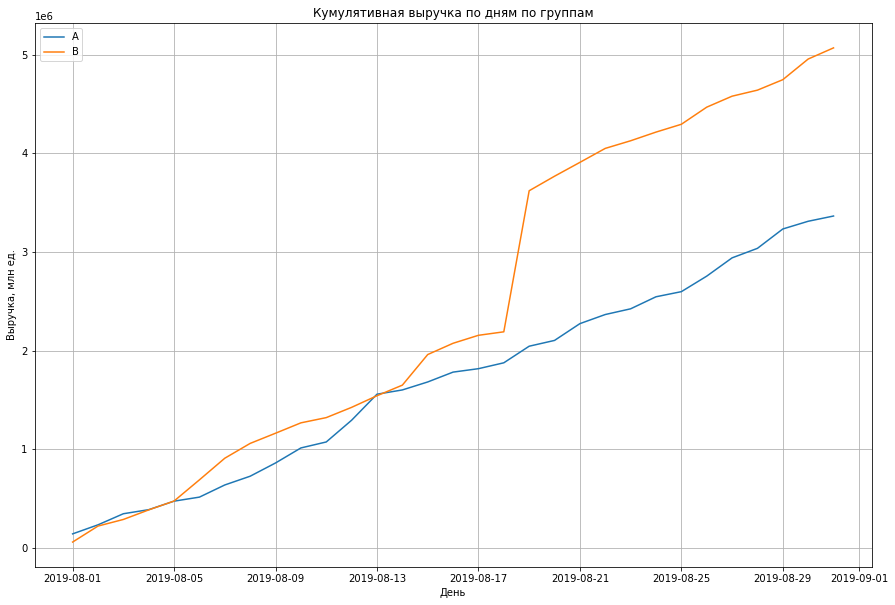

In [42]:
plt.figure(figsize=(15, 10))
# график выручки группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')

# график выручки группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.xlabel('День')
plt.ylabel('Выручка, млн ед.')
plt.title('Кумулятивная выручка по дням по группам')
plt.grid()
plt.legend();

По каждой из групп наблюдается увеличение выручки в ходе проведения теста.\
Группа А стабильно имеет худшие показатели по сравнению с группой B на всем протяжении теста.\
Примерно в середине теста наблюдается резкий скачок по выручке для группы B

### График кумулятивного среднего чека по группам

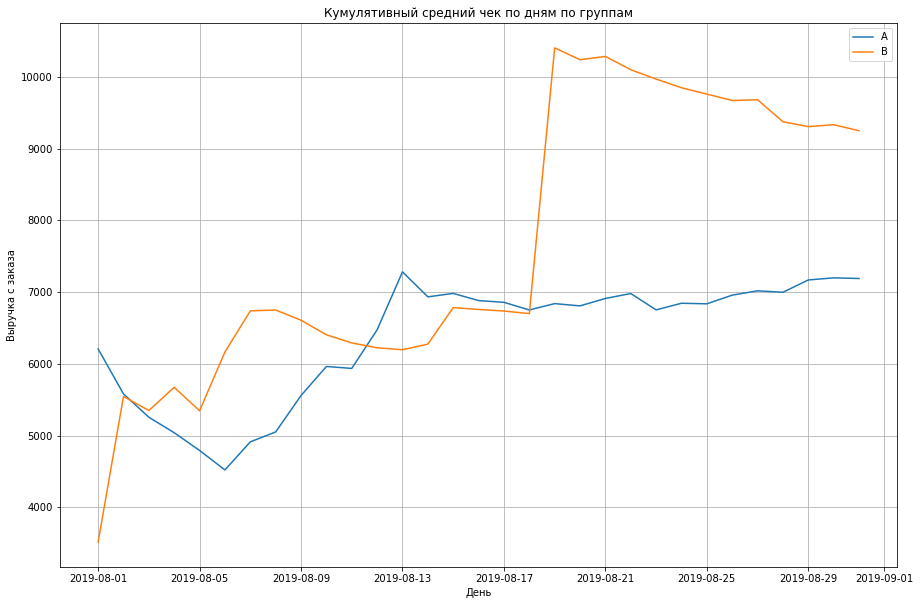

In [43]:
plt.figure(figsize=(15, 10))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.grid()
plt.title('Кумулятивный средний чек по дням по группам')
plt.xlabel('День')
plt.ylabel('Выручка с заказа')
plt.legend();

Тут так же группа В выделяется.

По среднему чеку также виден резкий скачок 18.08.\
для каждой группы показатели увеличиваются во времени.\
Куммулятивное значение среднего чека скачкообразное, необходимо дополнительное рассмотрение влияния выбросов, которые искажают результаты

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [44]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, 
                                                       left_on='date', 
                                                       right_on='date', 
                                                       how='left', 
                                                       suffixes=['A', 'B'])

In [45]:
merged_cumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


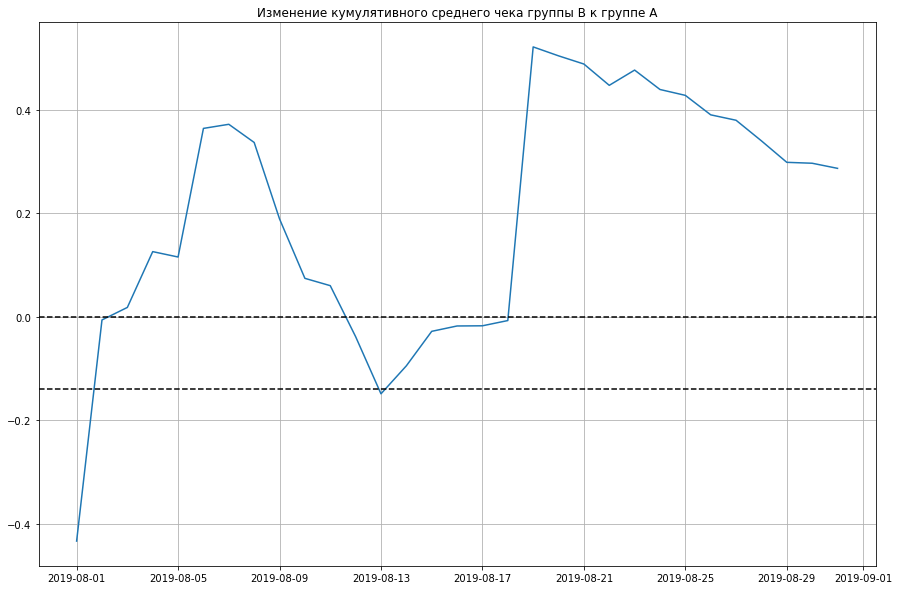

In [46]:
plt.figure(figsize=(15, 10))

plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) / 
         (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA']) - 1)

plt.grid()
plt.title('Изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=-0.14, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--');

Группа B лучше по показателям на всем протяжении теста за исключением периода с 12.08 по 15.08, когда он был ниже на 14 %\
Результаты теста значительно меняются несколько раз, скорее всего, в эти дни были совершены аномальные заказы

### График кумулятивного среднего количества заказов на посетителя по группам

Проведем расчет конверсии в заказы с учетом всех данных в таблице заказов.

In [47]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [48]:
orders_aggregated = (
    dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                           orders['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transaction_id': 'nunique', 'visitor_id': 'nunique', 'revenue': 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

In [49]:
# заново соберем данные
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [50]:
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [51]:
# количество заказов на посетителя
cumulative_data['orders_per_user'] = cumulative_data['orders'] / cumulative_data['visitors'] 

In [52]:
# отделяем данные по группе A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

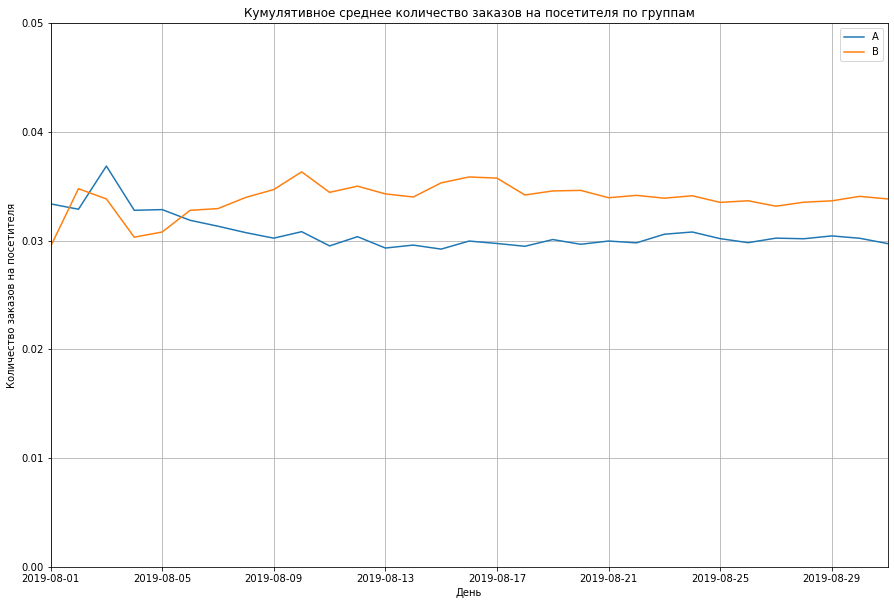

In [53]:
plt.figure(figsize=(15, 10))
plt.plot(cumulative_data_A['date'], cumulative_data_A['orders_per_user'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['orders_per_user'], label='B')
plt.legend()
plt.grid()
plt.xlabel('День')
plt.ylabel('Количество заказов на посетителя')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]);

На графике видно, что группа B после 5го августа стабильно была лучше по накопленным показателям относительно группы А, после 17го августа графики стабилизировались

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [54]:
merged_cumulative_conversions = (
    cumulative_data_A[['date','orders_per_user']]
    .merge(cumulative_data_B[['date','orders_per_user']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

In [55]:
merged_cumulative_conversions.head()

,date,orders_per_userA,orders_per_userB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


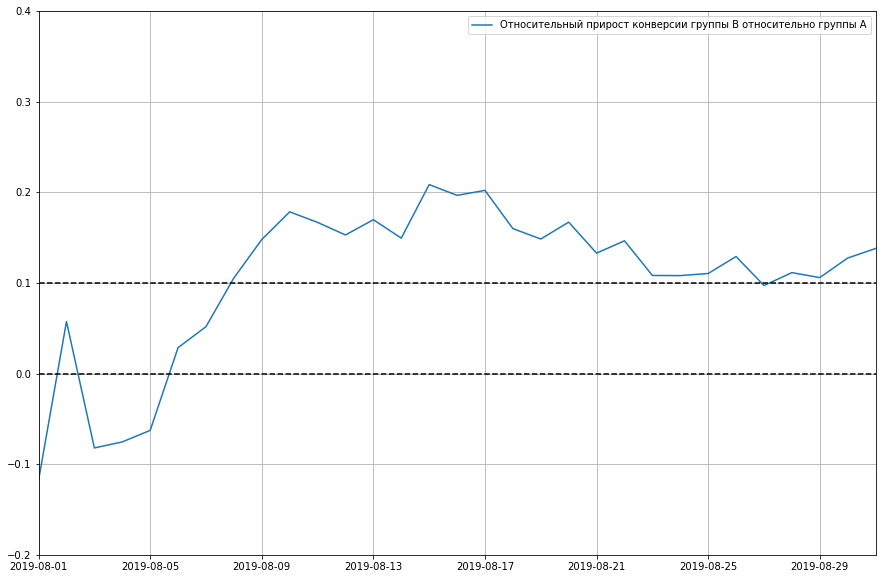

In [56]:
plt.figure(figsize=(15, 10))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['orders_per_userB'] / 
         merged_cumulative_conversions['orders_per_userA'] - 1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.grid()
plt.legend()


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')

plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.4]) ;

На графике относительного различия видно, что группа B стабильно лучше группы A на более чем 10 %, и к концу теста также наблюдается подъем. По графику можно предположить, что группа B точно не хуже группы A. В последней трети эксперимента наблюдается стабилизация результатов

### Точечный график количества заказов по пользователям

In [57]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


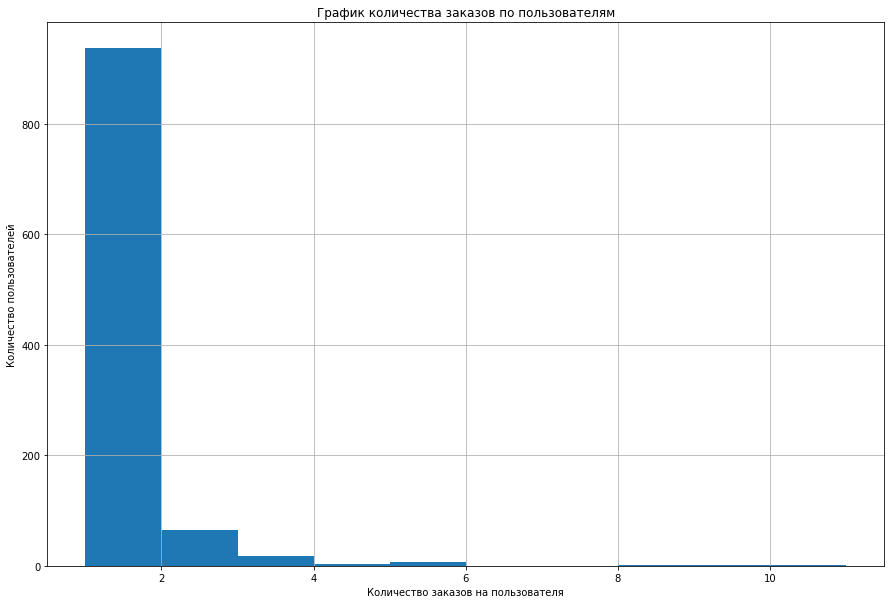

In [58]:
plt.figure(figsize=(15, 10))
plt.hist(orders_by_users['orders'])
plt.grid()
plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Количество пользователей')
plt.title('График количества заказов по пользователям');

Большинство покупателей заказывали только один раз.Однако доля пользователей с 2-3 заказами тоже значительна. 

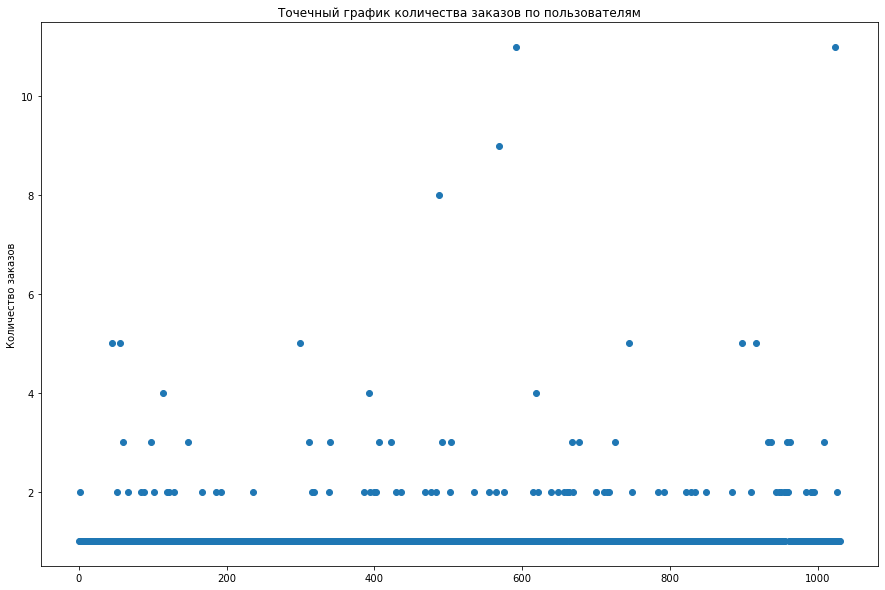

In [59]:
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders_by_users['orders'])

plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям');

точечная диаграмма подтверждает, что много пользователей с 1-3 заказами.

In [60]:
# 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5 % пользователей оформляли больше 2 заказов. И 1 % пользователей заказывали более 4 раз. 
Выберем более 2 заказов на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней.

### Точечный график стоимостей заказов

In [61]:
orders_clear.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


In [62]:
orders_clear['revenue'].max()

1294500

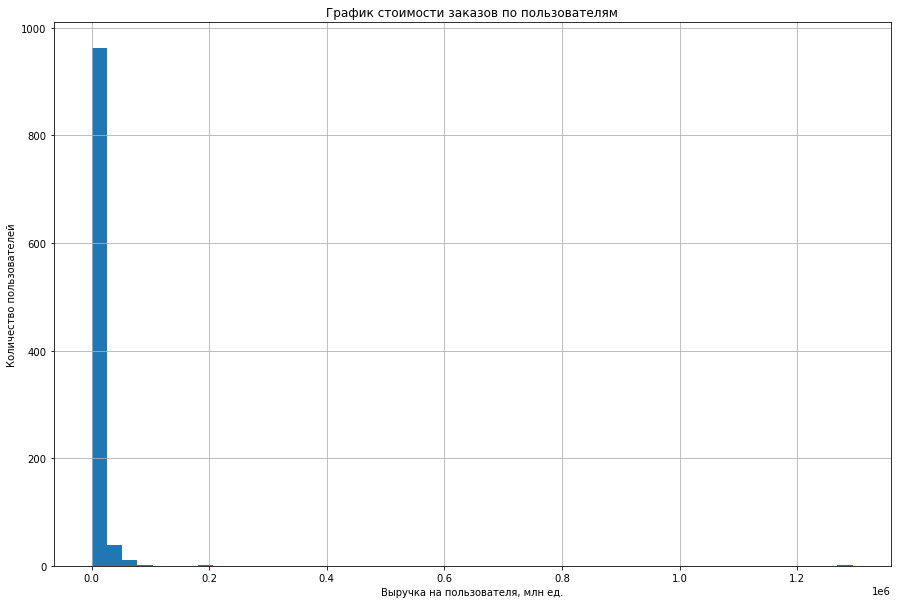

In [63]:
plt.figure(figsize=(15, 10))
plt.hist(orders_clear['revenue'], bins=50)
plt.xlabel('Выручка на пользователя, млн ед.')
plt.ylabel('Количество пользователей')
plt.title('График стоимости заказов по пользователям')
plt.grid();

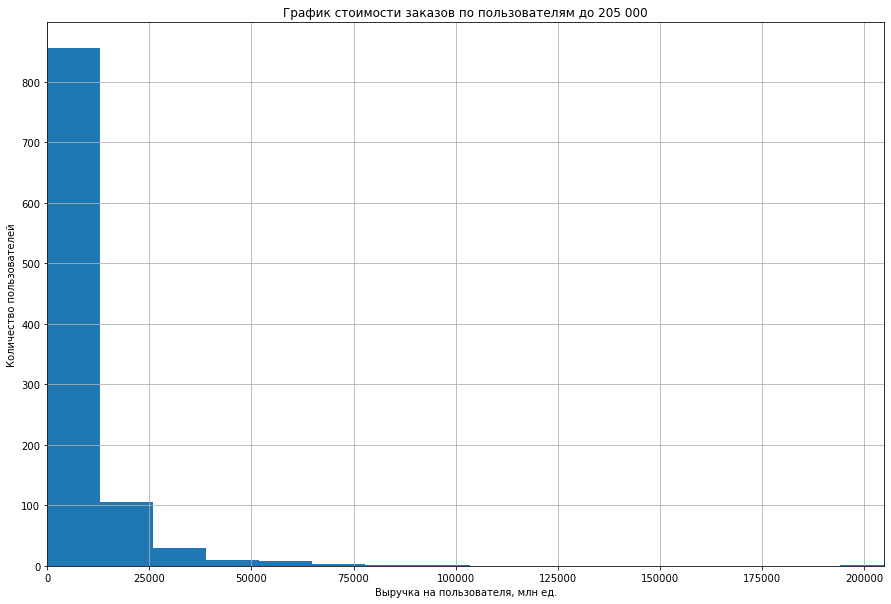

In [64]:
plt.figure(figsize=(15, 10))
plt.hist(orders_clear['revenue'], bins=100)
plt.grid()
plt.xlim(0,205000)
plt.xlabel('Выручка на пользователя, млн ед.')
plt.ylabel('Количество пользователей')
plt.title('График стоимости заказов по пользователям до 205 000');

Большая часть заказов варьируется по стоимости до примерно 12 тыс. В данных есть заказы дороже 25 000 и даже 200 000 тыс. и больше

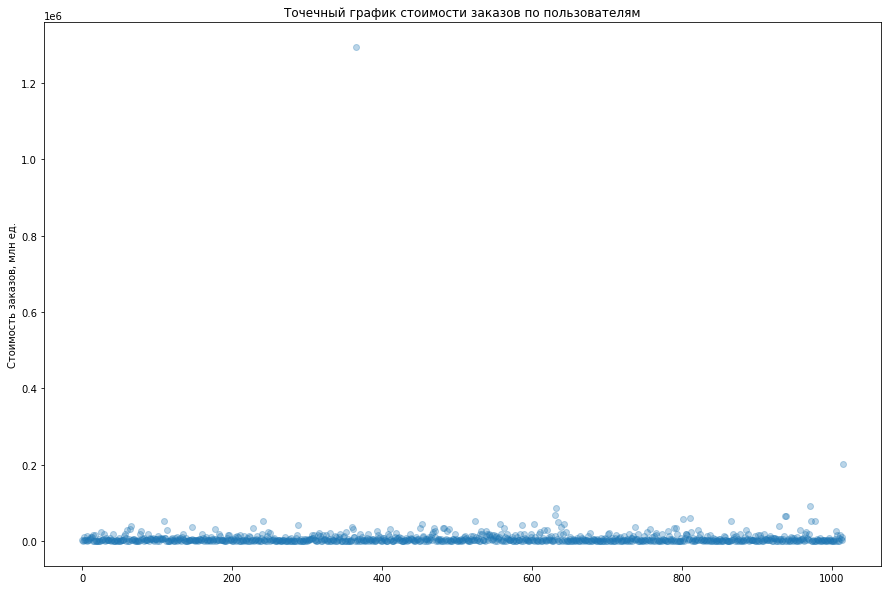

In [65]:
x_values = pd.Series(range(0, len(orders_clear['revenue'])))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders_clear['revenue'], alpha=0.3)
plt.ylabel('Стоимость заказов, млн ед.')
plt.title('Точечный график стоимости заказов по пользователям');

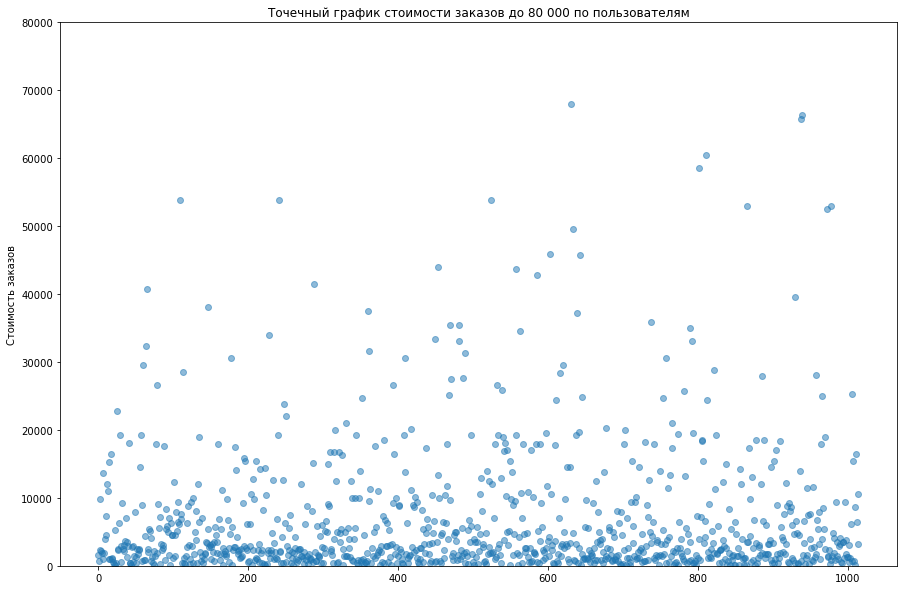

In [66]:
x_values = pd.Series(range(0, len(orders_clear['revenue'])))
plt.figure(figsize=(15, 10))
plt.ylim(0,80000);
plt.scatter(x_values, orders_clear['revenue'], alpha=0.5)
plt.ylabel('Стоимость заказов')
plt.title('Точечный график стоимости заказов до 80 000 по пользователям');

есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов более 20 000 рублей

In [67]:
# 95-й и 99-й перцентили стоимости заказов
np.percentile(orders_clear['revenue'], [95, 99])

array([26785., 53904.])

Не более 5 % заказов дороже 26 785 рублей и не более 1 % дороже 53 904 рублей.
По графикам и с учетом перцентилей по выручке выберем границу аномальных заказов выше 26 785 рублей

### Проверка гипотез (определение стат.значимости различий в средних числе заказов и чеках по группам)

Соберем необходимые данные

In [68]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A'] # количество пользователей в выбранную дату в группе A

visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A'] # количество пользователей до 
# выбранной даты включительно в группе A

In [69]:
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B'] # количество пользователей в выбранную дату в группе B

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B'] # количество пользователей до 
# выбранной даты включительно в группе B

In [70]:
orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A'] # количество заказов и 
                                                        # суммарная выручка в выбранную дату в группе A

orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_cummulative.columns = [
    'date',
    'orders_cummulative_A', # суммарное число заказов до выбранной даты включительно в группе A
    'revenue_cummulative_A', # суммарная выручка до выбранной даты включительно в группе A
]

In [71]:
orders_A_daily.head()

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,20,148579
1,2019-08-02,19,93822
2,2019-08-03,24,112473
3,2019-08-04,15,70825
4,2019-08-05,25,124218


In [72]:
orders_A_cummulative.head()

,date,orders_cummulative_A,revenue_cummulative_A
0,2019-08-01,20,148579
1,2019-08-02,39,242401
2,2019-08-03,63,354874
3,2019-08-04,78,425699
4,2019-08-05,103,549917


In [73]:
orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B'] # количество заказов
                                                    # и суммарная выручка в выбранную дату в группе B

orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_cummulative.columns = [
    'date',
    'orders_cummulative_B', # суммарное количество заказов до выбранной даты включительно в группе B
    'revenue_cummulative_B', # суммарная выручка до выбранной даты включительно в группе B
]

In [74]:
orders_B_daily.head()

,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,20,101217
1,2019-08-02,23,165531
2,2019-08-03,16,114248
3,2019-08-04,16,108571
4,2019-08-05,23,92428


In [75]:
orders_B_cummulative.head()

,date,orders_cummulative_B,revenue_cummulative_B
0,2019-08-01,20,101217
1,2019-08-02,43,266748
2,2019-08-03,59,380996
3,2019-08-04,75,489567
4,2019-08-05,98,581995


In [76]:
data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,20,148579,20,101217,20,148579,20,101217,719,713,719,713
1,2019-08-02,19,93822,23,165531,39,242401,43,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,63,354874,59,380996,507,509,1845,1803
3,2019-08-04,15,70825,16,108571,78,425699,75,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,103,549917,98,581995,756,707,3318,3280


#### Стат. значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным

Определим число совершённых заказов по пользователям для групп A и B

In [77]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders']
orders_by_users_A.head()

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [78]:
orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders']
orders_by_users_B.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов

In [79]:
sample_A = pd.concat([orders_by_users_A['orders'], 
                      pd.Series(0, index=np.arange(data['visitors_per_date_A']
                                                   .sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

In [80]:
sample_B = pd.concat([orders_by_users_B['orders'], 
                      pd.Series(0, index=np.arange(data['visitors_per_date_B']
                                                   .sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0)

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей

- Нулевая гипотеза: нет различий в среднем числе заказов на пользователя между группами;
- Альтернативная гипотеза: есть различия в среднем числе заказов на пользователя между группами

In [81]:
alpha = .05

In [82]:
pvalue = stats.mannwhitneyu(sample_A, sample_B)[1]

In [83]:
if pvalue < alpha:
    print("p-value равно {0:.3f}.\nОтвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет".format(pvalue))
else:
    print("p-value равно {0:.3f}.\nНет оснований отвергать нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. Тест показал статистически значимые различия в среднем числе заказов между группами".format(pvalue))

p-value равно 0.017.
Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет


In [84]:
# рассмотрим относительный прирост среднего числа заказов группы B: 
print("{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

0.138


Относительный выигрыш группы B по числу заказов равен 13.8 %

#### Стат. значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей

- Нулевая гипотеза: различий в среднем чеке заказов на пользователя между группами нет.
- Альтернативная гипотеза: различия в среднем чеке заказов на пользователя между группами есть

In [85]:
# также ведем расчет стат значимости различий в чеке без учета пользователей в обоих группах одновременно
pvalue = stats.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])[1]

In [86]:
if pvalue < alpha:
    print("p-value равно {0:.3f}.\nОтвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет".format(pvalue))
else:
    print("p-value равно {0:.3f}.\nНет оснований отвергать нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет".format(pvalue))

p-value равно 0.829.
Нет оснований отвергать нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет


Причины отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, отсутствуют. Посмотрим на относительные различия в среднем чеке между группами

In [87]:
# без учета пользователей, попавших в обе группы
print('{0:.3f}'.format(orders_clear[orders_clear['group']=='B']['revenue'].mean() / orders_clear[orders_clear['group']=='A']['revenue'].mean()-1))

0.287


In [88]:
# проверим какое различие с учетом пользователей, попавших в обе группы
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1))

0.259


относительное различие +28.7 % в среднем чеке группы B  к группе A по "сырым" данным не являются стат.значимыми (выбросы дают большое различие чеков, но их всего несколько и на общее различие среднего чека по группам они не влияют).\
После исключения пользователей, попавших в обе группы, видно, какое влияние они оказали на разницу и какой фактический результат проведения теста в части разницы в чеках

#### Стат. значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным

In [89]:
# границы аномалий по 95 перцентилю
revenue_lim = 26785 
order_lim = 2

In [90]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > order_lim]['user_id'],
        orders_by_users_B[orders_by_users_B['orders'] > order_lim]['user_id'],
    ],
    axis=0,
) # пользователи с заказами более 2х

In [91]:
users_with_expensive_orders = orders[orders['revenue'] > revenue_lim]['visitor_id'] # пользователи с заказами более 26.785 тыс

In [92]:
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormal_users.head(5)

568     113298937
1099    148427295
18      199603092
928     204675465
23      237748145
dtype: int64

In [93]:
abnormal_users.count()

80

Узнаем, как действия аномальных пользователей повлияют на результаты теста. Для начала подготовим выборки количества заказов по пользователям по группам теста

In [94]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [95]:
sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам

In [96]:
pvalue = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]

In [97]:
if pvalue < alpha:
    print("p-value равно {0:.3f}.\nОтвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет".format(pvalue))
else:
    print("p-value равно {0:.3f}.\nНет оснований отвергать нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет".format(pvalue))

p-value равно 0.016.
Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет


Посмотрим на относительный прирост среднего по заказам группы B на очищенных данных

In [98]:
print('{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

0.168


Прирост составляет 16.8 % против 13.8 % по "сырым" данным

#### Стат. значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [99]:
pvalue = stats.mannwhitneyu(
            orders_clear[
                np.logical_and(
                    orders_clear['group'] == 'A',
                    np.logical_not(orders_clear['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders_clear[
                np.logical_and(
                    orders_clear['group'] == 'B',
                    np.logical_not(orders_clear['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]

In [100]:
if pvalue < alpha:
    print("p-value равно {0:.3f}.\nОтвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет".format(pvalue))
else:
    print("p-value равно {0:.3f}.\nНет оснований отвергать нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет".format(pvalue))

p-value равно 0.646.
Нет оснований отвергать нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет


In [101]:
diff = (orders_clear[
            np.logical_and(
                orders_clear['group'] == 'B',
                np.logical_not(orders_clear['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders_clear[
            np.logical_and(
                orders_clear['group'] == 'A',
                np.logical_not(orders_clear['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
       )

print('{0:.3f}'.format(diff))

-0.048


Для очищенных данных p-value также выше 0.05, соответственно, и в этом случае, причины отвергать нулевую гипотезу о равенстве средних чеков по группам, отсутствуют.\
Однако, по очищенным данным, p-value снизился.

Также разница между сегментами сократилась с 28.7 % до -4.8 %. Данные различия после исключения аномалий также не являются стат.значимыми.

Общие выводы по результатам теста на равенство средних чеков по группам не изменились.\
По очищенным данным видно, как аномалии повлияли на результаты A/B-теста

## Общий вывод	

- График различия количества заказов на пользователя между группами сообщает, что результаты группы B лучше группы A и имеют тенденцию к росту;
- График относительного различия среднего чека скачет по дням, чтопозволяет определить наличие аномалий, но выводы по графику сделать нельзя;
- Тест с использованием критерия Манна-Уитни показал статистически значимые различий в среднем числе заказов между группами и по «сырым», и по данным после исключения аномалий по количеству заказов и их стоимости;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.



т.к. стат.значимой разницы по среднему чеку нет (чек не увеличился, но и не уменьшился) то при возросшем количестве заказов с сохранившимся средним чеком выручка будет так-же расти.
Исходя из обнаруженных фактов, тест предлагаем остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных группа B станет хуже группы A — практически нулевая.